In [1]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from stardist.models import StarDist3D
import numpy as np
import napari

import sys
import os
from pathlib import Path

cwd = os.getcwd()
print(f"Working dir: {cwd}")
module_path = os.path.abspath(Path(cwd).parents[3])
print(f"Module dir: {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.tools.utils import load_yaml, get_tensorboard_logs
from src.data.preprocess_utils import load_files, resample_crop_downsample
from src.models.stardist3D import stardist_predict, threshold_optimization

import seaborn as sns
sns.set_theme(style="darkgrid")

Working dir: C:\Users\lazi257c\Projects\organoid-segmentation-ML\notebooks\results\Stardist\trained_on_raw
Module dir: C:\Users\lazi257c\Projects\organoid-segmentation-ML


In [2]:
import matplotlib.pyplot as plt

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

In [3]:
exp_dir = os.path.join(module_path, "experiments", "exp11")
Path(os.path.join(module_path, "reports", "figures", "Stardist", "trained_on_raw")).mkdir(parents=True, exist_ok=True)   # create dir to save figures
Path(os.path.join(module_path, "reports", "figures", "Stardist", "trained_on_raw", "training_logs")).mkdir(parents=True, exist_ok=True)   # create dir to save logs

## Loading already done predictions

In [ ]:
predictions, fnames = load_files(os.path.join(exp_dir, "results"), return_fnames=True)
predictions[0].shape

## Visualising Stardist prediction in napari

In [ ]:
viewer = napari.Viewer()

# add original raw data
viewer.add_image(np.array(load_files(os.path.join(module_path, "data", "stardist_train_val_test_2022-07-28", "test", "raw_normalized"))))

# add predicted labels
viewer.add_labels((np.array(predictions)).astype('int32'))

## Training logs

In [4]:
path_to_events_file_train = os.path.join(exp_dir, "stardist", "logs", "train")
print(os.listdir(path_to_events_file_train))
path_to_events_file_train = os.path.join(exp_dir, "stardist", "logs", "train", os.listdir(path_to_events_file_train)[0])

['events.out.tfevents.1656623745.POL-HAASE-NB04.5312.1.v2']


In [5]:
path_to_events_file_val = os.path.join(exp_dir, "stardist", "logs", "validation")
print(os.listdir(path_to_events_file_val))
path_to_events_file_val = os.path.join(exp_dir, "stardist", "logs", "validation", os.listdir(path_to_events_file_val)[0])

['events.out.tfevents.1656624447.POL-HAASE-NB04.5312.2.v2']


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


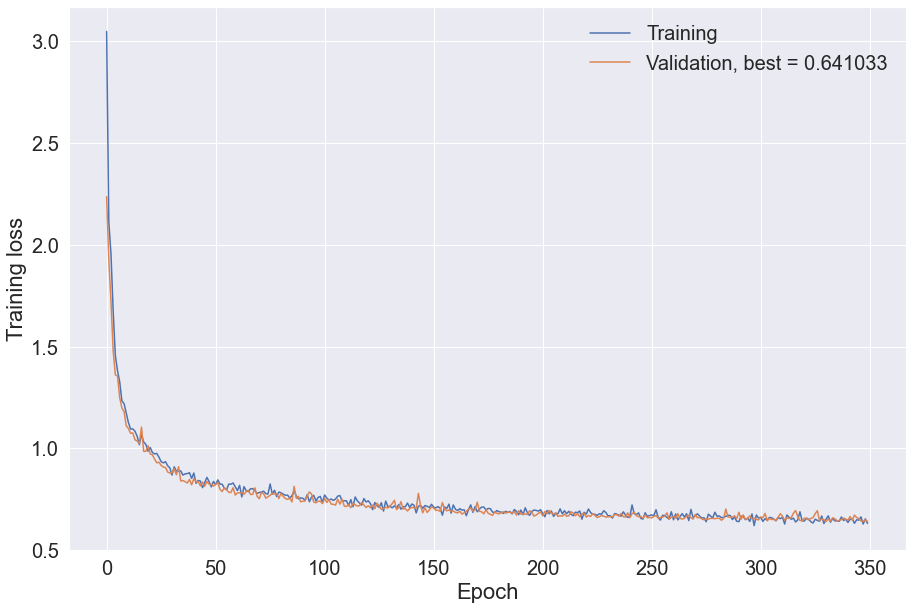

In [6]:
plt.gcf().set_size_inches(15, 10)

logs_trn = get_tensorboard_logs(path_to_events_file_train, 'epoch_loss')
logs_val = get_tensorboard_logs(path_to_events_file_val, 'epoch_loss')

m = min(logs_val)

plt.plot(logs_trn, label='Training')
plt.plot(logs_val, label=f'Validation, best = {round(float(m),6)}')
plt.legend(frameon=False)

plt.ylabel("Training loss")
plt.xlabel("Epoch")

plt.savefig(os.path.join(module_path, "reports", "figures", "Stardist", "trained_on_raw", "training_logs", "exp11-logs-loss.png"), bbox_inches='tight')

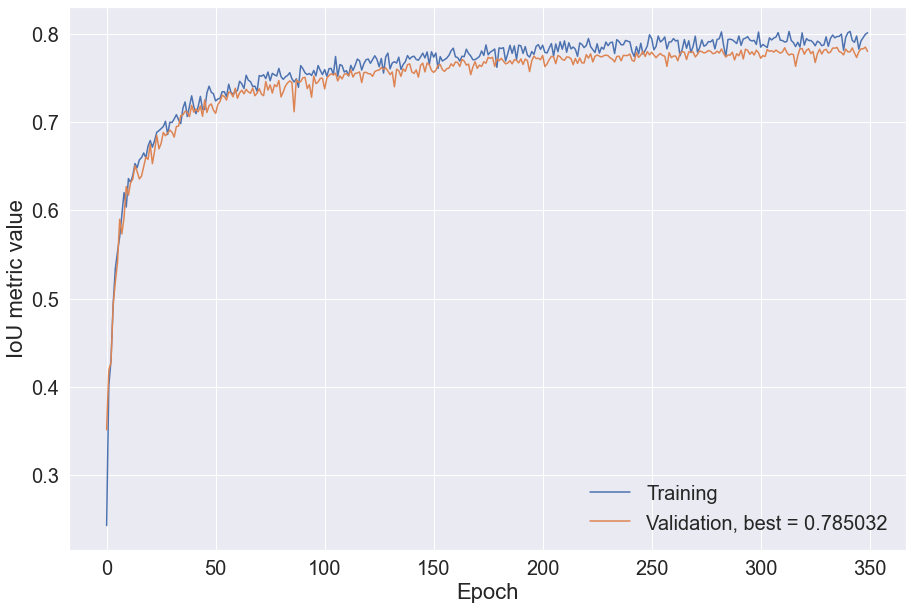

In [7]:
plt.gcf().set_size_inches(15, 10)

logs_trn = get_tensorboard_logs(path_to_events_file_train, 'epoch_dist_dist_iou_metric')
logs_val = get_tensorboard_logs(path_to_events_file_val, 'epoch_dist_dist_iou_metric')

m = max(logs_val)

plt.plot(logs_trn, label='Training')
plt.plot(logs_val, label=f'Validation, best = {round(float(m),6)}')
plt.legend(frameon=False)

plt.ylabel("IoU metric value")
plt.xlabel("Epoch")

plt.savefig(os.path.join(module_path, "reports", "figures", "Stardist", "trained_on_raw", "training_logs", "exp11-logs-eval.png"), bbox_inches='tight')